In [1]:
try: import pyomnidata
except: 
    !pip install pyomnidata
    import pyomnidata
pyomnidata.UpdateLocalData()

import torch
import numpy as np
from numpy.lib import recfunctions as rfn
# from skorch import NeuralNetClassifier
# from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("error")


Please set OMNIDATA_PATH environment variable


--2021-11-20 14:58:43--  https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/
Resolving spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)... 169.154.154.63, 2001:4d0:2418:121::63
Connecting to spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)|169.154.154.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘tmp/index.html’

     0K .......... .                                           4.45M=0.003s

2021-11-20 14:58:43 (4.45 MB/s) - ‘tmp/index.html’ saved [12151]

--2021-11-20 14:58:43--  https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/omni_5min2021.asc
Resolving spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)... 169.154.154.63, 2001:4d0:2418:121::63
Connecting to spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)|169.154.154.63|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 34374240 (33M) [text/plain]
Saving to: ‘tmp/omni_5min2021.asc’

     0K .......... .......... .......... .......... ..........  0%  496K 68s
    50K .......... .......... .......... .......... ..........  0%  990K 51s
   100K .......... .......... .......... .......... ..........  0% 50.4M 34s
   150K .......... .......... .......... .......... ..........  0% 1008K 34s
   200K .......... .......... .......... .......... ..........  0%  126M 27s
   250K .......... .......... .......... .......... ..........  0% 83.1M 22s
   300K .......... .......... .......... .......... ..........  1%  131M 19s
   350K .......... .......... .......... .......... ..........  1% 1024K 21s
   400K .......... .......... .......... .......... ..........  1%  133M 19s
   450K .......... .......... .......... .......... ..........  1%  129M 17s
   500K .......... .......... .......... .......... ..........  1% 90.6M 15s
   550K .......... .......... .......... .......... ..........  1%  127M 1

  7100K .......... .......... .......... .......... .......... 21% 1.41M 4s
  7150K .......... .......... .......... .......... .......... 21%  158M 4s
  7200K .......... .......... .......... .......... .......... 21%  156M 4s
  7250K .......... .......... .......... .......... .......... 21%  132M 4s
  7300K .......... .......... .......... .......... .......... 21%  157M 3s
  7350K .......... .......... .......... .......... .......... 22%  123M 3s
  7400K .......... .......... .......... .......... .......... 22%  166M 3s
  7450K .......... .......... .......... .......... .......... 22%  160M 3s
  7500K .......... .......... .......... .......... .......... 22%  147M 3s
  7550K .......... .......... .......... .......... .......... 22%  147M 3s
  7600K .......... .......... .......... .......... .......... 22%  135M 3s
  7650K .......... .......... .......... .......... .......... 22%  162M 3s
  7700K .......... .......... .......... .......... .......... 23%  153M 3s
  7750K ....

 13800K .......... .......... .......... .......... .......... 41% 1.53M 2s
 13850K .......... .......... .......... .......... .......... 41% 70.5M 2s
 13900K .......... .......... .......... .......... .......... 41%  117M 2s
 13950K .......... .......... .......... .......... .......... 41% 46.0M 2s
 14000K .......... .......... .......... .......... .......... 41%  104M 2s
 14050K .......... .......... .......... .......... .......... 42%  118M 2s
 14100K .......... .......... .......... .......... .......... 42% 60.7M 2s
 14150K .......... .......... .......... .......... .......... 42%  128M 2s
 14200K .......... .......... .......... .......... .......... 42% 94.1M 2s
 14250K .......... .......... .......... .......... .......... 42%  107M 2s
 14300K .......... .......... .......... .......... .......... 42% 60.2M 2s
 14350K .......... .......... .......... .......... .......... 42%  108M 2s
 14400K .......... .......... .......... .......... .......... 43%  119M 2s
 14450K ....

 21550K .......... .......... .......... .......... .......... 64% 1.50M 1s
 21600K .......... .......... .......... .......... .......... 64% 40.8M 1s
 21650K .......... .......... .......... .......... .......... 64% 32.9M 1s
 21700K .......... .......... .......... .......... .......... 64% 90.7M 1s
 21750K .......... .......... .......... .......... .......... 64% 52.2M 1s
 21800K .......... .......... .......... .......... .......... 65% 14.5M 1s
 21850K .......... .......... .......... .......... .......... 65% 37.2M 1s
 21900K .......... .......... .......... .......... .......... 65% 97.4M 1s
 21950K .......... .......... .......... .......... .......... 65% 49.6M 1s
 22000K .......... .......... .......... .......... .......... 65% 88.7M 1s
 22050K .......... .......... .......... .......... .......... 65% 41.0M 1s
 22100K .......... .......... .......... .......... .......... 65% 35.8M 1s
 22150K .......... .......... .......... .......... .......... 66% 16.4M 1s
 22200K ....

 27650K .......... .......... .......... .......... .......... 82% 1.44M 0s
 27700K .......... .......... .......... .......... .......... 82% 99.7M 0s
 27750K .......... .......... .......... .......... .......... 82% 30.2M 0s
 27800K .......... .......... .......... .......... .......... 82%  127M 0s
 27850K .......... .......... .......... .......... .......... 83% 78.5M 0s
 27900K .......... .......... .......... .......... .......... 83% 13.5M 0s
 27950K .......... .......... .......... .......... .......... 83% 30.7M 0s
 28000K .......... .......... .......... .......... .......... 83% 35.2M 0s
 28050K .......... .......... .......... .......... .......... 83% 72.4M 0s
 28100K .......... .......... .......... .......... .......... 83%  118M 0s
 28150K .......... .......... .......... .......... .......... 84% 57.1M 0s
 28200K .......... .......... .......... .......... .......... 84%  105M 0s
 28250K .......... .......... .......... .......... .......... 84% 17.9M 0s
 28300K ....

Converting to binary
Saved file: OMNI-5min-2021.bin
removed 'tmp/omni_5min2021.asc'


--2021-11-20 14:58:49--  https://spdf.gsfc.nasa.gov/pub/data/omni/high_res_omni/omni_min2021.asc
Resolving spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)... 169.154.154.63, 2001:4d0:2418:121::63
Connecting to spdf.gsfc.nasa.gov (spdf.gsfc.nasa.gov)|169.154.154.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157680000 (150M) [text/plain]
Saving to: ‘tmp/omni_min2021.asc’

     0K .......... .......... .......... .......... ..........  0%  494K 5m11s
    50K .......... .......... .......... .......... ..........  0%  995K 3m53s
   100K .......... .......... .......... .......... ..........  0% 44.5M 2m36s
   150K .......... .......... .......... .......... ..........  0% 1018K 2m35s
   200K .......... .......... .......... .......... ..........  0% 67.5M 2m4s
   250K .......... .......... .......... .......... ..........  0% 51.9M 1m44s
   300K .......... .......... .......... .......... ..........  0%  115M 89s
   350K .......... .......... .......... .......... ..

  5950K .......... .......... .......... .......... ..........  3%  122M 24s
  6000K .......... .......... .......... .......... ..........  3%  964K 25s
  6050K .......... .......... .......... .......... ..........  3%  128M 25s
  6100K .......... .......... .......... .......... ..........  3% 20.6M 25s
  6150K .......... .......... .......... .......... ..........  4%  165M 25s
  6200K .......... .......... .......... .......... ..........  4% 54.7M 24s
  6250K .......... .......... .......... .......... ..........  4% 74.3M 24s
  6300K .......... .......... .......... .......... ..........  4%  161M 24s
  6350K .......... .......... .......... .......... ..........  4%  143M 24s
  6400K .......... .......... .......... .......... ..........  4%  161M 24s
  6450K .......... .......... .......... .......... ..........  4%  161M 24s
  6500K .......... .......... .......... .......... ..........  4%  149M 23s
  6550K .......... .......... .......... .......... ..........  4%  160M 23s

 12850K .......... .......... .......... .......... ..........  8%  108M 13s
 12900K .......... .......... .......... .......... ..........  8%  110M 13s
 12950K .......... .......... .......... .......... ..........  8%  121M 13s
 13000K .......... .......... .......... .......... ..........  8% 87.5M 13s
 13050K .......... .......... .......... .......... ..........  8% 93.5M 13s
 13100K .......... .......... .......... .......... ..........  8% 97.3M 13s
 13150K .......... .......... .......... .......... ..........  8%  128M 13s
 13200K .......... .......... .......... .......... ..........  8% 96.9M 13s
 13250K .......... .......... .......... .......... ..........  8% 95.5M 13s
 13300K .......... .......... .......... .......... ..........  8%  130M 13s
 13350K .......... .......... .......... .......... ..........  8% 92.4M 13s
 13400K .......... .......... .......... .......... ..........  8%  128M 13s
 13450K .......... .......... .......... .......... ..........  8% 98.0M 13s

 18750K .......... .......... .......... .......... .......... 12% 63.3M 10s
 18800K .......... .......... .......... .......... .......... 12% 43.2M 10s
 18850K .......... .......... .......... .......... .......... 12% 38.8M 10s
 18900K .......... .......... .......... .......... .......... 12% 92.1M 10s
 18950K .......... .......... .......... .......... .......... 12%  131M 10s
 19000K .......... .......... .......... .......... .......... 12% 63.9M 10s
 19050K .......... .......... .......... .......... .......... 12%  104M 10s
 19100K .......... .......... .......... .......... .......... 12%  117M 10s
 19150K .......... .......... .......... .......... .......... 12%  104M 10s
 19200K .......... .......... .......... .......... .......... 12%  128M 10s
 19250K .......... .......... .......... .......... .......... 12% 97.6M 10s
 19300K .......... .......... .......... .......... .......... 12%  127M 10s
 19350K .......... .......... .......... .......... .......... 12%  112M 10s

 24700K .......... .......... .......... .......... .......... 16% 29.2M 9s
 24750K .......... .......... .......... .......... .......... 16% 62.9M 9s
 24800K .......... .......... .......... .......... .......... 16%  117M 9s
 24850K .......... .......... .......... .......... .......... 16% 98.1M 8s
 24900K .......... .......... .......... .......... .......... 16% 28.8M 8s
 24950K .......... .......... .......... .......... .......... 16% 64.8M 8s
 25000K .......... .......... .......... .......... .......... 16% 96.8M 8s
 25050K .......... .......... .......... .......... .......... 16%  127M 8s
 25100K .......... .......... .......... .......... .......... 16% 92.9M 8s
 25150K .......... .......... .......... .......... .......... 16%  132M 8s
 25200K .......... .......... .......... .......... .......... 16% 80.8M 8s
 25250K .......... .......... .......... .......... .......... 16%  116M 8s
 25300K .......... .......... .......... .......... .......... 16%  106M 8s
 25350K ....

 30800K .......... .......... .......... .......... .......... 20% 26.4M 7s
 30850K .......... .......... .......... .......... .......... 20% 52.4M 7s
 30900K .......... .......... .......... .......... .......... 20% 65.2M 7s
 30950K .......... .......... .......... .......... .......... 20% 37.7M 7s
 31000K .......... .......... .......... .......... .......... 20%  128M 7s
 31050K .......... .......... .......... .......... .......... 20% 34.2M 7s
 31100K .......... .......... .......... .......... .......... 20% 55.7M 7s
 31150K .......... .......... .......... .......... .......... 20%  118M 7s
 31200K .......... .......... .......... .......... .......... 20%  105M 7s
 31250K .......... .......... .......... .......... .......... 20%  108M 7s
 31300K .......... .......... .......... .......... .......... 20% 87.7M 7s
 31350K .......... .......... .......... .......... .......... 20%  103M 7s
 31400K .......... .......... .......... .......... .......... 20%  120M 7s
 31450K ....

 36850K .......... .......... .......... .......... .......... 23% 22.3M 6s
 36900K .......... .......... .......... .......... .......... 23%  128M 6s
 36950K .......... .......... .......... .......... .......... 24% 65.3M 6s
 37000K .......... .......... .......... .......... .......... 24% 42.0M 6s
 37050K .......... .......... .......... .......... .......... 24% 58.7M 6s
 37100K .......... .......... .......... .......... .......... 24% 22.9M 6s
 37150K .......... .......... .......... .......... .......... 24%  128M 6s
 37200K .......... .......... .......... .......... .......... 24% 28.8M 6s
 37250K .......... .......... .......... .......... .......... 24% 36.4M 6s
 37300K .......... .......... .......... .......... .......... 24%  125M 6s
 37350K .......... .......... .......... .......... .......... 24% 50.6M 6s
 37400K .......... .......... .......... .......... .......... 24%  109M 6s
 37450K .......... .......... .......... .......... .......... 24% 42.2M 6s
 37500K ....

 44000K .......... .......... .......... .......... .......... 28% 1.95M 6s
 44050K .......... .......... .......... .......... .......... 28% 15.9M 6s
 44100K .......... .......... .......... .......... .......... 28% 15.0M 6s
 44150K .......... .......... .......... .......... .......... 28% 15.2M 6s
 44200K .......... .......... .......... .......... .......... 28% 29.4M 6s
 44250K .......... .......... .......... .......... .......... 28% 87.3M 6s
 44300K .......... .......... .......... .......... .......... 28% 35.6M 6s
 44350K .......... .......... .......... .......... .......... 28% 25.6M 6s
 44400K .......... .......... .......... .......... .......... 28% 56.6M 6s
 44450K .......... .......... .......... .......... .......... 28% 50.3M 6s
 44500K .......... .......... .......... .......... .......... 28% 36.0M 6s
 44550K .......... .......... .......... .......... .......... 28%  107M 6s
 44600K .......... .......... .......... .......... .......... 28% 32.4M 6s
 44650K ....

 50100K .......... .......... .......... .......... .......... 32% 1.78M 6s
 50150K .......... .......... .......... .......... .......... 32% 51.4M 6s
 50200K .......... .......... .......... .......... .......... 32% 10.3M 6s
 50250K .......... .......... .......... .......... .......... 32% 12.6M 6s
 50300K .......... .......... .......... .......... .......... 32% 63.1M 6s
 50350K .......... .......... .......... .......... .......... 32% 21.8M 6s
 50400K .......... .......... .......... .......... .......... 32%  113M 6s
 50450K .......... .......... .......... .......... .......... 32% 33.4M 6s
 50500K .......... .......... .......... .......... .......... 32% 37.2M 6s
 50550K .......... .......... .......... .......... .......... 32% 94.1M 6s
 50600K .......... .......... .......... .......... .......... 32% 50.8M 6s
 50650K .......... .......... .......... .......... .......... 32% 52.1M 6s
 50700K .......... .......... .......... .......... .......... 32% 37.6M 6s
 50750K ....

 56400K .......... .......... .......... .......... .......... 36% 2.14M 6s
 56450K .......... .......... .......... .......... .......... 36% 7.89M 6s
 56500K .......... .......... .......... .......... .......... 36% 36.2M 6s
 56550K .......... .......... .......... .......... .......... 36% 81.6M 6s
 56600K .......... .......... .......... .......... .......... 36% 14.2M 6s
 56650K .......... .......... .......... .......... .......... 36% 38.6M 6s
 56700K .......... .......... .......... .......... .......... 36% 91.9M 6s
 56750K .......... .......... .......... .......... .......... 36% 77.6M 6s
 56800K .......... .......... .......... .......... .......... 36% 82.4M 6s
 56850K .......... .......... .......... .......... .......... 36% 36.5M 6s
 56900K .......... .......... .......... .......... .......... 36% 31.6M 6s
 56950K .......... .......... .......... .......... .......... 37%  124M 6s
 57000K .......... .......... .......... .......... .......... 37% 19.6M 6s
 57050K ....

 62750K .......... .......... .......... .......... .......... 40% 1.96M 5s
 62800K .......... .......... .......... .......... .......... 40% 7.72M 5s
 62850K .......... .......... .......... .......... .......... 40% 24.6M 5s
 62900K .......... .......... .......... .......... .......... 40% 21.1M 5s
 62950K .......... .......... .......... .......... .......... 40% 27.7M 5s
 63000K .......... .......... .......... .......... .......... 40% 28.0M 5s
 63050K .......... .......... .......... .......... .......... 40% 46.1M 5s
 63100K .......... .......... .......... .......... .......... 41% 66.2M 5s
 63150K .......... .......... .......... .......... .......... 41%  127M 5s
 63200K .......... .......... .......... .......... .......... 41%  116M 5s
 63250K .......... .......... .......... .......... .......... 41% 56.9M 5s
 63300K .......... .......... .......... .......... .......... 41% 18.9M 5s
 63350K .......... .......... .......... .......... .......... 41% 57.2M 5s
 63400K ....

 69350K .......... .......... .......... .......... .......... 45% 1.70M 5s
 69400K .......... .......... .......... .......... .......... 45% 28.9M 5s
 69450K .......... .......... .......... .......... .......... 45% 20.3M 5s
 69500K .......... .......... .......... .......... .......... 45% 21.0M 5s
 69550K .......... .......... .......... .......... .......... 45% 95.7M 5s
 69600K .......... .......... .......... .......... .......... 45% 37.4M 5s
 69650K .......... .......... .......... .......... .......... 45%  130M 5s
 69700K .......... .......... .......... .......... .......... 45% 41.1M 5s
 69750K .......... .......... .......... .......... .......... 45% 57.8M 5s
 69800K .......... .......... .......... .......... .......... 45%  128M 5s
 69850K .......... .......... .......... .......... .......... 45% 24.7M 5s
 69900K .......... .......... .......... .......... .......... 45% 50.4M 5s
 69950K .......... .......... .......... .......... .......... 45%  105M 5s
 70000K ....

 76300K .......... .......... .......... .......... .......... 49% 1.76M 5s
 76350K .......... .......... .......... .......... .......... 49% 29.4M 5s
 76400K .......... .......... .......... .......... .......... 49% 22.6M 5s
 76450K .......... .......... .......... .......... .......... 49% 20.1M 5s
 76500K .......... .......... .......... .......... .......... 49% 83.2M 5s
 76550K .......... .......... .......... .......... .......... 49%  107M 5s
 76600K .......... .......... .......... .......... .......... 49% 52.4M 5s
 76650K .......... .......... .......... .......... .......... 49% 73.1M 5s
 76700K .......... .......... .......... .......... .......... 49% 96.4M 5s
 76750K .......... .......... .......... .......... .......... 49% 30.8M 4s
 76800K .......... .......... .......... .......... .......... 49% 32.7M 4s
 76850K .......... .......... .......... .......... .......... 49% 53.6M 4s
 76900K .......... .......... .......... .......... .......... 49% 47.8M 4s
 76950K ....

 83700K .......... .......... .......... .......... .......... 54% 1.83M 4s
 83750K .......... .......... .......... .......... .......... 54%  122M 4s
 83800K .......... .......... .......... .......... .......... 54% 32.7M 4s
 83850K .......... .......... .......... .......... .......... 54% 9.84M 4s
 83900K .......... .......... .......... .......... .......... 54% 87.9M 4s
 83950K .......... .......... .......... .......... .......... 54%  109M 4s
 84000K .......... .......... .......... .......... .......... 54% 65.1M 4s
 84050K .......... .......... .......... .......... .......... 54%  129M 4s
 84100K .......... .......... .......... .......... .......... 54% 96.1M 4s
 84150K .......... .......... .......... .......... .......... 54% 56.5M 4s
 84200K .......... .......... .......... .......... .......... 54%  129M 4s
 84250K .......... .......... .......... .......... .......... 54% 26.4M 4s
 84300K .......... .......... .......... .......... .......... 54% 46.4M 4s
 84350K ....

 91850K .......... .......... .......... .......... .......... 59% 57.0M 4s
 91900K .......... .......... .......... .......... .......... 59% 83.5M 4s
 91950K .......... .......... .......... .......... .......... 59% 88.0M 4s
 92000K .......... .......... .......... .......... .......... 59% 7.97M 4s
 92050K .......... .......... .......... .......... .......... 59% 96.1M 4s
 92100K .......... .......... .......... .......... .......... 59% 45.1M 4s
 92150K .......... .......... .......... .......... .......... 59% 82.7M 4s
 92200K .......... .......... .......... .......... .......... 59%  128M 4s
 92250K .......... .......... .......... .......... .......... 59% 96.3M 4s
 92300K .......... .......... .......... .......... .......... 59%  129M 4s
 92350K .......... .......... .......... .......... .......... 60% 53.1M 4s
 92400K .......... .......... .......... .......... .......... 60% 96.1M 4s
 92450K .......... .......... .......... .......... .......... 60%  107M 4s
 92500K ....

100750K .......... .......... .......... .......... .......... 65% 1.71M 3s
100800K .......... .......... .......... .......... .......... 65%  154M 3s
100850K .......... .......... .......... .......... .......... 65% 9.50M 3s
100900K .......... .......... .......... .......... .......... 65% 68.1M 3s
100950K .......... .......... .......... .......... .......... 65%  107M 3s
101000K .......... .......... .......... .......... .......... 65% 44.9M 3s
101050K .......... .......... .......... .......... .......... 65% 77.2M 3s
101100K .......... .......... .......... .......... .......... 65% 64.9M 3s
101150K .......... .......... .......... .......... .......... 65% 31.4M 3s
101200K .......... .......... .......... .......... .......... 65%  123M 3s
101250K .......... .......... .......... .......... .......... 65% 96.2M 3s
101300K .......... .......... .......... .......... .......... 65%  123M 3s
101350K .......... .......... .......... .......... .......... 65%  100M 3s
101400K ....

110600K .......... .......... .......... .......... .......... 71% 1.78M 2s
110650K .......... .......... .......... .......... .......... 71% 30.8M 2s
110700K .......... .......... .......... .......... .......... 71%  160M 2s
110750K .......... .......... .......... .......... .......... 71% 10.6M 2s
110800K .......... .......... .......... .......... .......... 71%  106M 2s
110850K .......... .......... .......... .......... .......... 72% 34.1M 2s
110900K .......... .......... .......... .......... .......... 72% 81.3M 2s
110950K .......... .......... .......... .......... .......... 72% 92.6M 2s
111000K .......... .......... .......... .......... .......... 72%  110M 2s
111050K .......... .......... .......... .......... .......... 72% 90.9M 2s
111100K .......... .......... .......... .......... .......... 72% 97.7M 2s
111150K .......... .......... .......... .......... .......... 72% 34.7M 2s
111200K .......... .......... .......... .......... .......... 72% 52.6M 2s
111250K ....

116000K .......... .......... .......... .......... .......... 75% 1.86M 2s
116050K .......... .......... .......... .......... .......... 75% 82.9M 2s
116100K .......... .......... .......... .......... .......... 75% 9.81M 2s
116150K .......... .......... .......... .......... .......... 75% 56.3M 2s
116200K .......... .......... .......... .......... .......... 75%  132M 2s
116250K .......... .......... .......... .......... .......... 75% 60.4M 2s
116300K .......... .......... .......... .......... .......... 75%  116M 2s
116350K .......... .......... .......... .......... .......... 75% 47.6M 2s
116400K .......... .......... .......... .......... .......... 75%  131M 2s
116450K .......... .......... .......... .......... .......... 75% 71.6M 2s
116500K .......... .......... .......... .......... .......... 75% 43.5M 2s
116550K .......... .......... .......... .......... .......... 75% 73.6M 2s
116600K .......... .......... .......... .......... .......... 75%  103M 2s
116650K ....

121700K .......... .......... .......... .......... .......... 79% 1.91M 2s
121750K .......... .......... .......... .......... .......... 79% 11.8M 2s
121800K .......... .......... .......... .......... .......... 79% 58.2M 2s
121850K .......... .......... .......... .......... .......... 79% 89.1M 2s
121900K .......... .......... .......... .......... .......... 79% 45.3M 2s
121950K .......... .......... .......... .......... .......... 79% 56.4M 2s
122000K .......... .......... .......... .......... .......... 79% 97.9M 2s
122050K .......... .......... .......... .......... .......... 79% 92.9M 2s
122100K .......... .......... .......... .......... .......... 79%  118M 2s
122150K .......... .......... .......... .......... .......... 79%  105M 2s
122200K .......... .......... .......... .......... .......... 79% 53.0M 2s
122250K .......... .......... .......... .......... .......... 79% 95.9M 2s
122300K .......... .......... .......... .......... .......... 79%  105M 2s
122350K ....

127750K .......... .......... .......... .......... .......... 82% 1.83M 1s
127800K .......... .......... .......... .......... .......... 83% 42.2M 1s
127850K .......... .......... .......... .......... .......... 83% 57.5M 1s
127900K .......... .......... .......... .......... .......... 83% 63.6M 1s
127950K .......... .......... .......... .......... .......... 83%  104M 1s
128000K .......... .......... .......... .......... .......... 83% 97.2M 1s
128050K .......... .......... .......... .......... .......... 83% 96.1M 1s
128100K .......... .......... .......... .......... .......... 83% 50.0M 1s
128150K .......... .......... .......... .......... .......... 83% 63.1M 1s
128200K .......... .......... .......... .......... .......... 83%  129M 1s
128250K .......... .......... .......... .......... .......... 83% 68.0M 1s
128300K .......... .......... .......... .......... .......... 83% 37.7M 1s
128350K .......... .......... .......... .......... .......... 83% 41.6M 1s
128400K ....

134100K .......... .......... .......... .......... .......... 87% 1.88M 1s
134150K .......... .......... .......... .......... .......... 87%  124M 1s
134200K .......... .......... .......... .......... .......... 87% 28.3M 1s
134250K .......... .......... .......... .......... .......... 87% 63.2M 1s
134300K .......... .......... .......... .......... .......... 87% 67.5M 1s
134350K .......... .......... .......... .......... .......... 87% 97.8M 1s
134400K .......... .......... .......... .......... .......... 87% 75.1M 1s
134450K .......... .......... .......... .......... .......... 87%  112M 1s
134500K .......... .......... .......... .......... .......... 87% 50.5M 1s
134550K .......... .......... .......... .......... .......... 87%  115M 1s
134600K .......... .......... .......... .......... .......... 87%  107M 1s
134650K .......... .......... .......... .......... .......... 87% 45.6M 1s
134700K .......... .......... .......... .......... .......... 87% 64.8M 1s
134750K ....

140800K .......... .......... .......... .......... .......... 91% 1.89M 1s
140850K .......... .......... .......... .......... .......... 91% 26.3M 1s
140900K .......... .......... .......... .......... .......... 91% 27.3M 1s
140950K .......... .......... .......... .......... .......... 91%  128M 1s
141000K .......... .......... .......... .......... .......... 91% 97.3M 1s
141050K .......... .......... .......... .......... .......... 91%  128M 1s
141100K .......... .......... .......... .......... .......... 91% 48.1M 1s
141150K .......... .......... .......... .......... .......... 91%  106M 1s
141200K .......... .......... .......... .......... .......... 91%  127M 1s
141250K .......... .......... .......... .......... .......... 91% 97.5M 1s
141300K .......... .......... .......... .......... .......... 91% 63.1M 1s
141350K .......... .......... .......... .......... .......... 91% 96.3M 1s
141400K .......... .......... .......... .......... .......... 91% 40.7M 1s
141450K ....

147800K .......... .......... .......... .......... .......... 96% 1.87M 0s
147850K .......... .......... .......... .......... .......... 96%  123M 0s
147900K .......... .......... .......... .......... .......... 96% 33.9M 0s
147950K .......... .......... .......... .......... .......... 96% 31.2M 0s
148000K .......... .......... .......... .......... .......... 96% 60.0M 0s
148050K .......... .......... .......... .......... .......... 96%  106M 0s
148100K .......... .......... .......... .......... .......... 96% 97.0M 0s
148150K .......... .......... .......... .......... .......... 96% 55.4M 0s
148200K .......... .......... .......... .......... .......... 96%  116M 0s
148250K .......... .......... .......... .......... .......... 96% 67.9M 0s
148300K .......... .......... .......... .......... .......... 96%  109M 0s
148350K .......... .......... .......... .......... .......... 96% 84.7M 0s
148400K .......... .......... .......... .......... .......... 96% 96.4M 0s
148450K ....

Converting to binary
Saved file: OMNI-1min-2021.bin
removed 'tmp/omni_min2021.asc'
Done


In [2]:
# Data parameters
years = [2009, 2019] # The range of solar cycle 24, cited from Wikipedia.org/Solar_cycle_24
# define what inputs we want to consider for our model - names listed in following cell
inputs = [12, 20, 24, 25, 26, 27, 47]
target = [20, 24, 25, 47] # entry for the regression target
forecastOffset = 12 # integer number of hours between the final input datapoint and the forcasted value
inputHours = 24 # integer number of hours of data in the input space
datapointOffset = 36 # integer number of hours between the starts of two datapoints - forecastOffset + inputHours gives no overlap in datapoints.

# ML parameters
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
batchSize = 128 # amount of datapoints in a single training instance
epochs = 2000 # number of times to train and update a network
verboseEpochs = 250 # how many epochs between print statements to update on progress. set negative to not print updates.
cfv = False # enable cross fold validation - if False, default to a 60 30 10 train validate test split.
# nfolds = 4 # amount of folds to separate the data into for cross validation - not yet implemented

# Network parameters

In [3]:
omnidata = pyomnidata.GetOMNI(years)
names = rfn.get_names(omnidata.dtype)
print("int access, field title, dtype, example value, end example value")
for i in range(48):
    print(i, names[i], omnidata.dtype[i], omnidata[0][i], omnidata[-1][i])
print(omnidata.shape)

int access, field title, dtype, example value, end example value
0 Date int32 20090101 20191231
1 ut float32 0.0 23.916666
2 utc float64 517200.0 613607.9166660309
3 SC_IMF uint8 71 51
4 SC_Plasma uint8 71 51
5 N_IMF int32 5 5
6 N_Plasma int32 5 5
7 PercInterp float32 100.0 2.0
8 TimeShift float32 3108.0 7511.0
9 RMSTimeShift float32 25.0 367.0
10 RMSPhaseFrontNorm float32 nan nan
11 dTime float32 52.0 -38.0
12 B float32 4.78 4.68
13 BxGSE float32 -4.4 -3.19
14 ByGSE float32 1.41 2.98
15 BzGSE float32 -0.93 -1.37
16 ByGSM float32 1.61 3.22
17 BzGSM float32 -0.52 -0.59
18 RMSSDBScalar float32 0.03 0.18
19 RMSSDFieldVector float32 0.48 0.41
20 FlowSpeed float32 508.7 296.3
21 Vx float32 -508.1 -296.2
22 Vy float32 6.6 3.6
23 Vz float32 -23.6 1.8
24 ProtonDensity float32 2.76 5.24
25 Temp float32 207123.0 26135.0
26 FlowPressure float32 1.43 0.92
27 E float32 0.26 0.17
28 Beta float32 1.69 1.56
29 MA float32 8.8 7.3
30 Xsc float32 218.04 217.59
31 Ysc float32 10.18 101.5
32 Zsc float32 22

In [4]:
numHours = int(omnidata[-1][2]) - int(omnidata[0][2]) # data[i][2] is UTC. This operation lets us get how many days are in our datatset.
history = torch.zeros(numHours, len(inputs)) # We want each hour as a datapoint, with an average of the points inside
hour = 0
dataIterator = 0
targets = []
lastBad = 0
badDict = {}
isNaN = []

for i in range(numHours):
    hourList = [] # define a list to hold the data before averaging
    trgList = []
    while int(omnidata[dataIterator][1]) == hour and dataIterator < len(omnidata): # get all the data in this hour
        inputList = []
        hourTrgs = []
        for j in inputs: # I couldn't figure out how to access multiple entries at the same time, so I appended them in a list
            inputList.append(omnidata[dataIterator][j]) # and put that list as an element of hourList
        hourList.append(inputList) # put the desired data in the holding list
        for j in target:
            hourTrgs.append(omnidata[dataIterator][j])
        trgList.append(hourTrgs)
        dataIterator += 1 # move to the next 5 minute increment
#     if dataIterator >= len(omnidata)-1:
#         break    
    try:
        hourInfo = np.nanmean(hourList, axis=0)
        targets.append(np.nanmean(trgList, axis=0))
        for j in range(len(inputs)):
            history[i,j] = float(hourInfo[j]) # assign our new averaged data to a history tensor. Probably should figure out why 'float' is necessary, but that's a problem for future rob.    
        isNaN.append(False)
    except RuntimeWarning:
        history[i,:] = float('NaN')
#         if i <= len(targets): This line might be useful later. Depends on how hte error checking works.
        targets.append([float('nan') for _ in targets])
        key = i-lastBad
        if key not in badDict:
            badDict[key] = 1
        else:
            badDict[key] += 1
#         print(key, ":", omnidata[dataIterator-1][0], ":", omnidata[dataIterator-1][1])
        lastBad = i
        isNaN.append(True)
    hour = (hour+1)%24 # move to the next hour, resetting if we go over a day


In [5]:
# TODO: put this in dataPicture.py
tot=0
nans=0
nonovdp = 0
ovdp = 0
for key, value in sorted(badDict.items()):
#     print(key, ":", value)
    nonovdp += int(key/(forecastOffset + inputHours)) * value
    nans += value
    tot += (key-1)*value
    ovdp += max(key-(forecastOffset + inputHours), 0) * value
print(tot, nans, nonovdp, ovdp)

91986 4337 1981 58731


In [6]:
print(history.shape)
print(history)

torch.Size([96407, 7])
tensor([[ 4.4792e+00,  5.0922e+02,  2.6492e+00,  ...,  1.3733e+00,
         -1.7083e-01,  6.9167e-02],
        [ 4.0867e+00,  5.1497e+02,  2.6492e+00,  ...,  1.4075e+00,
          5.4000e-01,  1.0917e-01],
        [ 4.6550e+00,  5.1642e+02,  2.2917e+00,  ...,  1.2267e+00,
          2.0333e-01,  7.2500e-02],
        ...,
        [ 4.0200e+00,  3.0878e+02,  1.0598e+01,  ...,  2.0233e+00,
          1.0922e+00,  1.2250e-01],
        [ 3.8300e+00,  3.0956e+02,  1.0053e+01,  ...,  1.9275e+00,
          9.9250e-01,  1.3667e-01],
        [ 2.7700e+00,  3.0769e+02,  9.6492e+00,  ...,  1.8308e+00,
          5.7250e-01,  1.3417e-01]])


In [7]:
windowLength = forecastOffset + inputHours
isValidStart =  []
# Check for any NANs - those screw with the neural nets.
for i in range(len(isNaN) - windowLength):
    #                         Check our inputs for NaNs             Check our targets for NaNs
    isValidStart.append(not any(isNaN[i:i+windowLength]) and not np.isnan(targets[i+windowLength][:]).any())

# make sure there is an offset between valid data start points
for i in range(len(isValidStart)):
    prev = min(i, datapointOffset) # this line prevents us checking outside the bounds of our array
    if any(isValidStart[i-prev:i]): # check back far enough to know if this point is in the offset for another point
        isValidStart[i] = False
# in hindsight I could have done this in the previous for loop, but too late now.
starts = []
for i in range(len(isValidStart)):
    if isValidStart[i]:
        starts.append(i)

In [8]:
# The dataset we want to regress on has as many days as possible, with no overlap.
data = torch.zeros(len(starts), inputHours, len(inputs), device=device) 
ys = []
for i in range(len(starts)):
    data[i,:,:] = history[starts[i]:starts[i] + inputHours, :]
    ys.append(targets[starts[i] + windowLength])
ys = np.array(ys)

In [9]:
print(len(targets))
print(len(history))
print(len(isNaN))
print(np.sum(isNaN))
print(np.sum(isValidStart))
print(data.shape)
print(len(ys))

96407
96407
96407
4337
1886
torch.Size([1886, 24, 7])
1886


In [10]:
def percentError(yhat, target):
    retval = []
    for i in range(len(target)):
        retval.append(torch.mean(abs(target[i]-yhat[i])/target[i]))
    return retval

In [11]:
def dictToList(grid):
    entries = 1
    for _, value in grid.items():
        entries *= max(len(value), 1)
    retval = [{} for _ in range(entries)]

    rotationFactor = 1
    for key, value in grid.items():
        for i in range(entries):
            retval[i][key] = value[int(i/rotationFactor) % len(value)]
        rotationFactor *= len(value)
    return retval
    
def gridCV(grid, module, x, targets, epochs):
    arglist = dictToList(grid)
    

In [12]:
def train631(x, y, net, *netargs, lr = 0.0001, rounds=epochs, **netkwargs):
    numPoints = x.shape[0]
    ziplist = list(zip(x, y))
    j = int(numPoints*0.3)
    k = int(numPoints*0.1)
    trainset, valset, testset = torch.utils.data.random_split(ziplist, [numPoints-j-k, j, k])

    trainloader = torch.utils.data.DataLoader(trainset, batch_size = batchSize)
    # Should we change the batch size? We don't backpropagate here, so what batch size would be fastest?
    valloader = torch.utils.data.DataLoader(valset, batch_size = batchSize)
    testloader = torch.utils.data.DataLoader(testset, batch_size = batchSize)

    model = net(*netargs, **netkwargs)
    model = model.to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    lfc = torch.nn.MSELoss() # in a perfect world, this would be an input. But it's not.

    trainLoss = []
    valLoss = []
    trainPCE = []
    valPCE = []

    for epoch in range(rounds):
        if verboseEpochs > 0 and (not (epoch+1) % verboseEpochs): verbose = True
        else: verbose = False
        model.train()
        batch_loss = []
        batch_PCE = []
        for (xtrain, ytrain) in trainloader:
            xtrain = xtrain.cuda()
            ytrain = ytrain.cuda()
            opt.zero_grad()
            output = model(xtrain)
            output = output.cuda()
            loss = lfc(output, ytrain)
            loss.backward()
            opt.step()
            batch_loss.append(loss)
            for pce in percentError(output, ytrain): batch_PCE.append(pce)
        if verbose: print(f'The training loss for epoch  {epoch+1}/{rounds} was {torch.mean(torch.Tensor(batch_loss))}')
#         if verbose: print(torch.mean(torch.Tensor(batch_loss)))
        trainLoss.append(torch.mean(torch.Tensor(batch_loss)).item())
        tnsr = torch.zeros((len(batch_PCE)))
        for i in range(len(batch_PCE)):
            entry = torch.mean(batch_PCE[i]).item()
            tnsr[i] = entry
        trainPCE.append(torch.mean(tnsr).item())

        batch_loss = []
        batch_PCE = []
        model.eval()
        for (xval, yval) in valloader:
            xval = xval.cuda()
            yval = yval.cuda()
            output = model(xval).cuda()
            loss = lfc(output, yval)
            batch_loss.append(loss.item())
            for pce in percentError(output, yval): batch_PCE.append(pce)
        if verbose: print(f'The validation loss for epoch {epoch+1}/{rounds} was {torch.mean(torch.Tensor(batch_loss))}')
        valLoss.append(torch.mean(torch.Tensor(batch_loss)).item())
        tnsr = torch.zeros(len(batch_PCE))
        for i in range(len(batch_PCE)): tnsr[i] = torch.mean(batch_PCE[i]).item()
        valPCE.append(torch.mean(torch.Tensor(tnsr)).item())
    
    testLoss = []
    testPCE = []
    for (xtest, ytest) in testloader:
        # Model is still in eval mode from the end of the for loop, so we do not have to switch.
        output = model(xtest.to(device)).to(device)
        ytest = ytest.to(device)
        loss = lfc(output, ytest)
        testLoss.append(loss)
        for pce in percentError(output, ytest): testPCE.append(pce)
    testLoss = torch.mean(torch.Tensor(testLoss))
    tnsr = torch.zeros((len(testPCE)))
    for i in range(len(testPCE)): tnsr[i] = torch.mean(testPCE[i]).item()
    print(f'The test loss is {testLoss}. This is a {torch.mean(tnsr) * 100}% error.')
    
    plt.plot(trainLoss[int(rounds * .2):])
    plt.plot(valLoss[int(rounds * .2):])
    plt.show()
    plt.plot(trainPCE[int(rounds * .2):])
    plt.plot(valPCE[int(rounds * .2):])
    plt.show()

In [13]:
def newSizer(orig, size, stride, pad):
    '''
    This is a function that calculates the size of one side of an output from an convolutional or pooling layer.
    All the arguments should be integers. 
    '''
    if stride == None: stride = size
    return int((orig + 2*pad - size)/stride + 1)


class cnnNet(torch.nn.Module):
    def __init__(self, kernel1width=5, kernel1channels=10, mpool = 2, kernel2width=5, kernel2channels=10, apool=3, dense=1024, dense2=2048):
        super(cnnNet, self).__init__()
        # note: tuples in the 'size' argument in torch allow for non-square kernels, which are necessary for time based CNNs.
        self.conv1 = torch.nn.Conv2d(1,kernel1channels, (kernel1width, 1))
        n = newSizer(inputHours, kernel1width, 1, 0)
        self.mp = torch.nn.MaxPool2d((mpool, 1)) 
        n = newSizer(n, mpool, mpool, 0)
        self.conv2 = torch.nn.Conv2d(kernel1channels, kernel2channels, (kernel2width, len(inputs)))
        n = newSizer(n, kernel2width, 1, 0)
        self.avp = torch.nn.AvgPool2d((apool, 1))
        self.vectorSize = kernel2channels * newSizer(n, apool, apool, 0)
        self.relu = torch.nn.ReLU()
        
        self.fc1 = torch.nn.Linear(self.vectorSize, dense)
        self.fc2 = torch.nn.Linear(dense, dense2)
        self.fc3 = torch.nn.Linear(dense2, len(target))
        
    def forward(self, x):
        x = x.reshape(-1,1, inputHours, len(inputs))
        x = self.relu(self.mp(self.conv1(x)))
        x = self.relu(self.avp(self.conv2(x)))
        x = self.fc3(self.fc2(self.relu(self.fc1(x.reshape((-1,1,self.vectorSize))))))
        return x.reshape(-1, len(target))


The training loss for epoch  250/4000 was 1969658368.0
The validation loss for epoch 250/4000 was 1828132608.0
The training loss for epoch  500/4000 was 1780498688.0
The validation loss for epoch 500/4000 was 1630730368.0
The training loss for epoch  750/4000 was 1747500544.0
The validation loss for epoch 750/4000 was 1603944192.0
The training loss for epoch  1000/4000 was 1715771776.0
The validation loss for epoch 1000/4000 was 1579920384.0
The training loss for epoch  1250/4000 was 1687004928.0
The validation loss for epoch 1250/4000 was 1560290688.0
The training loss for epoch  1500/4000 was 1661969920.0
The validation loss for epoch 1500/4000 was 1546290816.0
The training loss for epoch  1750/4000 was 1640696320.0
The validation loss for epoch 1750/4000 was 1537598464.0
The training loss for epoch  2000/4000 was 1623294848.0
The validation loss for epoch 2000/4000 was 1533682816.0
The training loss for epoch  2250/4000 was 1609301504.0
The validation loss for epoch 2250/4000 was 15

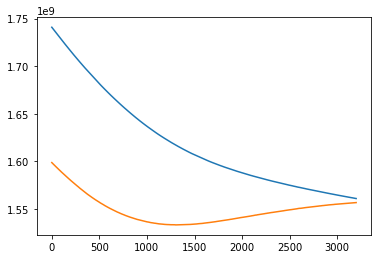

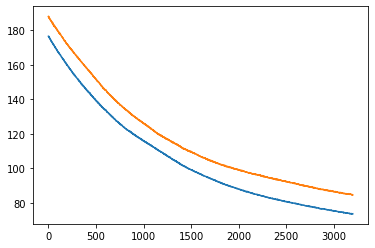

In [14]:
if not cfv:
    train631(data, ys, cnnNet, lr = 0.0000005, rounds=4000)
    

In [15]:
class LSTM(torch.nn.Module):

    def __init__(self, num_classes = len(target), input_size = len(inputs), 
                 seq_length = inputHours, hidden_size = 8, num_layers = 4):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.lin = torch.nn.Linear(seq_length * hidden_size, num_classes)
       

    def forward(self, x):
        bs = x.shape[0]
        output, (h_out, _) = self.lstm(x) #, (h_0, c_0)
#         print(h_out.shape, _.shape, output.shape)
        out = self.lin(output.reshape(bs, self.seq_length * self.hidden_size))
        return out
    

The training loss for epoch  250/2000 was 3447427072.0
The validation loss for epoch 250/2000 was 3406015744.0
The training loss for epoch  500/2000 was 3443852032.0
The validation loss for epoch 500/2000 was 3402214656.0
The training loss for epoch  750/2000 was 3440370432.0
The validation loss for epoch 750/2000 was 3398511360.0
The training loss for epoch  1000/2000 was 3436910080.0
The validation loss for epoch 1000/2000 was 3394831104.0
The training loss for epoch  1250/2000 was 3433459200.0
The validation loss for epoch 1250/2000 was 3391160832.0
The training loss for epoch  1500/2000 was 3430014464.0
The validation loss for epoch 1500/2000 was 3387495936.0
The training loss for epoch  1750/2000 was 3426573568.0
The validation loss for epoch 1750/2000 was 3383835392.0
The training loss for epoch  2000/2000 was 3423136768.0
The validation loss for epoch 2000/2000 was 3380178944.0
The test loss is 2817724672.0. This is a 72.38397216796875% error.


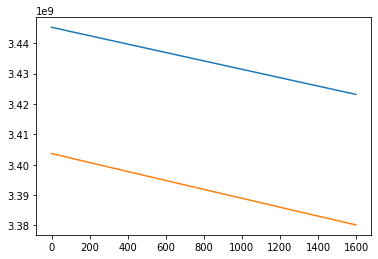

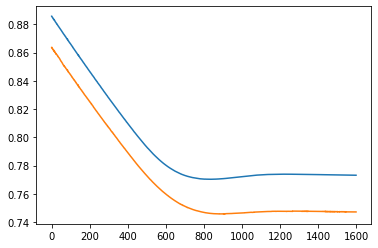

In [16]:
# print(len(target), len(inputs))
if not cfv:
    train631(data, ys, LSTM, num_classes = len(target), input_size =len(inputs), 
             seq_length = inputHours, hidden_size = 16, num_layers = 3)

In [17]:
































































big markdown cell

SyntaxError: invalid syntax (3704210068.py, line 1)